# 1163150 - Backpropagation - Exercise: Computational Graphs

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-and-System-Packages)
* [Exercise: Pen and Paper Backpropagation](#Pen-and-Paper-Backpropagation)
* [Exercise: Implement the Example](#Implement-the-Example)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses) 

## Introduction

In this exercise, you will apply the backpropagation algorithm to computational graphs. Backpropagation is the method we use to calculate the gradients of all learnable parameters in an artificial neural network efficiently and conveniently. Approaching the algorithm from the perspective of computational graphs gives a good intuition about its operations.

## Requirements

### Knowledge
You should already be familiar with the backpropagation algorithm, as well as differential calculus. Following resources we recommend if this topic is new to you:

- Chapter 6.5 of [Deep Learning](http://www.deeplearningbook.org/contents/ml.html) by Ian Goodfellow gives a brief introduction into the field
- MOOC [Calculus](https://www.khanacademy.org/math/calculus-1) from Khan Academy

### Python and System Packages
To run that Notebook you should have the `graphviz` package installed on your System. Look at the [Graphviz-Website](https://graphviz.gitlab.io/download/) for installation guidance. Further, the Python module `Digraph` is only working with Jupyter Notebook (not Lab) at the moment. 

In [1]:
# External Modules
from graphviz import Digraph
import numpy as np
import hashlib

#https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation#33433735

## Pen and Paper Backpropagation
Given the function $ f(a,b,c) $ as a computational graph with the following values for the parameters:

$$
a = 2 \\
b = e \; (Euler \;number, \;b \approx 2.7183) \\
c = 3
$$

Your tasks are:
- Calculate the partial derivative $ \frac {\partial out} {\partial a}$, $ \frac {\partial out} {\partial b}$ and $ \frac {\partial out} {\partial c}$ using backpropagation
- Give an equation that expresses the graph

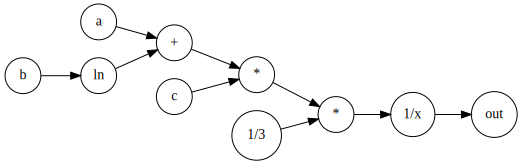

In [5]:
# creating empty graph ad set some attributes
f = Digraph('computational_graph', filename='graph_clean.gv')
f.attr(rankdir='LR')
f.attr('node', shape='circle')

# create the graph
f.node('a')
f.node('b')
f.node('c')
f.edge('a', '+', label='')
f.edge('b', 'ln', label=' ')
f.edge('ln', '+', label=' ')
f.edge('+','* ', label=' ')
f.edge('c','* ')
f.edge('* ', '*')
f.edge('1/3 ', '*')
f.edge('*','1/x')
f.edge('1/x','out')

f

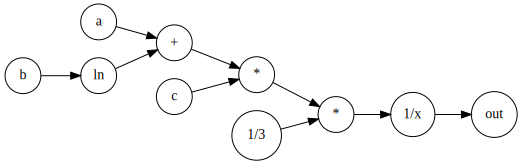

In [12]:
forward = Digraph('computational_graph', filename='graph_clean.gv')
forward.attr(rankdir='LR')
forward.attr('node', shape='circle')

# create the graph
forward.node('a')
forward.node('b')
forward.node('c')
forward.edge('a', '+', label='')
forward.edge('b', 'ln', label=' ')
forward.edge('ln', '+', label=' ')
forward.edge('+','* ', label=' ')
forward.edge('c','* ')
forward.edge('* ', '*')
forward.edge('1/3 ', '*')
forward.edge('*','1/x')
forward.edge('1/x','out')

forward

## Implement the Example
In the pen and paper exercise, you calculated the partial derivatives for some specific values of $a$, $b$, and $c$ of the graph $f(a,b,c)$. Your task now is to generalize that solution. Implement the used functions $+$, $*$ and $1/x$ and their derivatives. Chain the functions to calculate $f(a,b,c)$ in a forward pass and $ \frac {\partial out} {\partial a}$, $ \frac {\partial out} {\partial b}$, $ \frac {\partial out} {\partial c}$ in the backward pass for arbitrary values of $a$, $b$, and $c$.


In [78]:
# Your implementation here
class Function:
    def apply(param=None):
        raise NotImplementedError
    def derive(x):
        raise NotImplementedError
        
class Plus(Function):
    def apply(param=None):
        if(param.ndim==1):
            return np.sum(param)
    def derive(alpha, x):
        return 1
    
class Mult(Function):
    def apply(param=None):
        if(param.ndim==1):
            return np.prod(param)
    def derive(alpha,x):
        return alpha
    
class OneOnX(Function):
    def apply(param=None):
        if(param.ndim==1):
            return 1.0/param 
    def derive(x):
        #return (-1.0)/np.power(x,2)   
        return - 1./np.power(x,2)
class ln(Function):
    def apply(param):
        return np.log(param)
    def derive(x):
        return 1./x
        
        

In [74]:
#Forward
a = 2
b = np.e
c = 3
input1 = np.array([a,np.log(b)])
#print("Input 1", input1)
val1 = Plus.apply(input1)
print("1st computation", val1)
input2 = np.array([val1, c])
#print("Input 2", input2)
val2 = Mult.apply(input2)
print("2nd computation", val2)
val3 = Mult.apply(np.array([val2, (1.0/3.0)]))
print("3rd computation", val3)
outValue = OneOnX.apply(np.array([val3]))
print("Out computation", outValue)

1st computation 3.0
2nd computation 9.0
3rd computation 3.0
Out computation [0.33333333]


In [79]:
#Backward
df_df = 1.0
print("df_df", df_df)
d1 = OneOnX.derive(val3) * df_df
print("First derivative", d1)
alpha = 1./3.
xVal1 = val2
d2 = Mult.derive(alpha, xVal1) * d1
print("Second derivative", d2)
xVal2 = val1 #a+lnb
alpha = c
d3_1 = Mult.derive(alpha,xVal2)*d2
print("Third derivative - X", d3_1)
d3_2 = Mult.derive(xVal2, alpha)*d2
print("Third derivative - alpha", d3_2)
xVal3 = a
gamma = np.log(b)
d4_1 = Plus.derive(gamma, xVal3)*d3_1
print("4th derivative - x", d4_1)
d4_2 = Plus.derive(xVal3, gamma)*d3_1
print("4th derivative - gamma", d4_2)
xVal4 = b
d5 = ln.derive(xVal4) * d4_2
print("5th derivative", d5)

df_df 1.0
First derivative -0.1111111111111111
Second derivative -0.037037037037037035
Third derivative - X -0.1111111111111111
Third derivative - alpha -0.1111111111111111
4th derivative - x -0.1111111111111111
4th derivative - gamma -0.1111111111111111
5th derivative -0.04087549346349359


## Summary and Outlook

In this exercise, we expressed a function $f(a,b,c)$ as a computational graph and calculated the partial derivatives for its parameters using backpropagation. You also explored a possible implementation of that specific example. The generalization of that example-implementation can lead to a solution like [Autograd](https://github.com/HIPS/autograd).  

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Computational Graphs <br/>
by Benjamin Voigt <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Benjamin Voigt

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.